# 02. Edge Detection
-   **Nama:** Muhammad Neo Cicero Koda
-   **NIM:** 13522108
-   **Fitur Unik:** Eksperimen dua metode deteksi tepi (Sobel dan Canny).

In [11]:
import cv2
import numpy as np
import pandas as pd
from skimage import data
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import os

os.makedirs('output', exist_ok=True)

print("Libraries imported successfully.")

Libraries imported successfully.


In [12]:
# Load images (coin and chelsea)
img_std_color = data.coins()
img_std_u8 = img_as_ubyte(img_std_color)
print(f"Loaded coins.png: {img_std_u8.shape}, {img_std_u8.dtype}")

img_extra_color = data.chelsea()
img_extra_u8 = cv2.cvtColor(img_extra_color, cv2.COLOR_RGB2GRAY)
print(f"Loaded chelsea.png (grayscale): {img_extra_u8.shape}, {img_extra_u8.dtype}")

Loaded coins.png: (303, 384), uint8
Loaded chelsea.png (grayscale): (300, 451), uint8


Sobel filtering complete. 3 variations processed for 2 images.


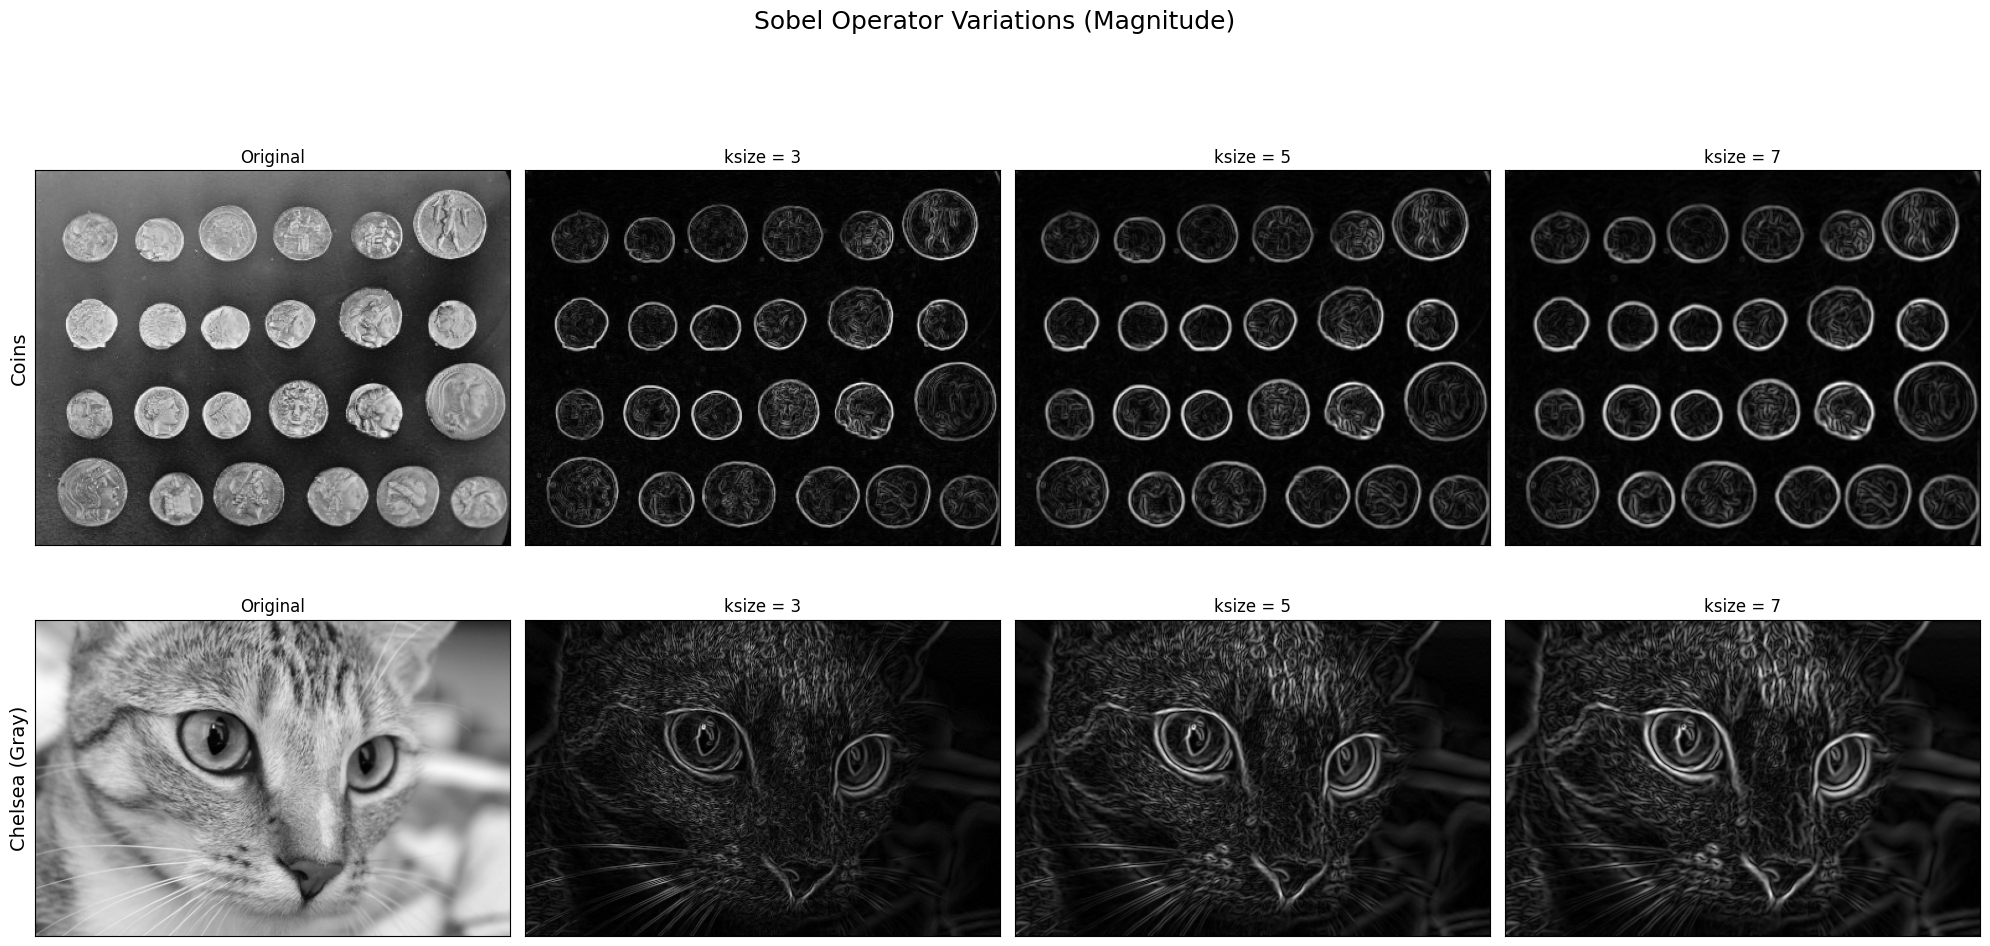

In [13]:
# Sobel filter and variations
results_list = []
sobel_params = [{'k': 3}, {'k': 5}, {'k': 7}]
sobel_std_results = []
sobel_ext_results = []

for p in sobel_params:
    ksize = p['k']
    
    sobel_x_std = cv2.Sobel(img_std_u8, cv2.CV_64F, 1, 0, ksize=ksize)
    sobel_y_std = cv2.Sobel(img_std_u8, cv2.CV_64F, 0, 1, ksize=ksize)
    sobel_mag_std = cv2.magnitude(sobel_x_std, sobel_y_std)
    res_std = cv2.normalize(sobel_mag_std, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    sobel_std_results.append(res_std)
    fname_std = f'output/coins_sobel_k{ksize}.png'
    cv2.imwrite(fname_std, res_std)
    results_list.append({'Image': 'coins', 'Method': 'Sobel Magnitude', 'Parameter': f"ksize={ksize}", 'Output File': fname_std})
    
    sobel_x_ext = cv2.Sobel(img_extra_u8, cv2.CV_64F, 1, 0, ksize=ksize)
    sobel_y_ext = cv2.Sobel(img_extra_u8, cv2.CV_64F, 0, 1, ksize=ksize)
    sobel_mag_ext = cv2.magnitude(sobel_x_ext, sobel_y_ext)
    res_ext = cv2.normalize(sobel_mag_ext, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    sobel_ext_results.append(res_ext)
    fname_ext = f'output/chelsea_sobel_k{ksize}.png'
    cv2.imwrite(fname_ext, res_ext)
    results_list.append({'Image': 'chelsea', 'Method': 'Sobel Magnitude', 'Parameter': f"ksize={ksize}", 'Output File': fname_ext})

print("Sobel filtering complete. 3 variations processed for 2 images.")

fig, ax = plt.subplots(2, 4, figsize=(20, 11))
fig.suptitle('Sobel Operator Variations (Magnitude)', fontsize=18)

ax[0, 0].imshow(img_std_u8, cmap='gray')
ax[0, 0].set_title('Original')
ax[0, 0].set_ylabel('Coins', fontsize=14)
ax[0, 1].imshow(sobel_std_results[0], cmap='gray')
ax[0, 1].set_title(f"ksize = {sobel_params[0]['k']}")
ax[0, 2].imshow(sobel_std_results[1], cmap='gray')
ax[0, 2].set_title(f"ksize = {sobel_params[1]['k']}")
ax[0, 3].imshow(sobel_std_results[2], cmap='gray')
ax[0, 3].set_title(f"ksize = {sobel_params[2]['k']}")

ax[1, 0].imshow(img_extra_u8, cmap='gray')
ax[1, 0].set_title('Original')
ax[1, 0].set_ylabel('Chelsea (Gray)', fontsize=14)
ax[1, 1].imshow(sobel_ext_results[0], cmap='gray')
ax[1, 1].set_title(f"ksize = {sobel_params[0]['k']}")
ax[1, 2].imshow(sobel_ext_results[1], cmap='gray')
ax[1, 2].set_title(f"ksize = {sobel_params[1]['k']}")
ax[1, 3].imshow(sobel_ext_results[2], cmap='gray')
ax[1, 3].set_title(f"ksize = {sobel_params[2]['k']}")

for a in ax.flat:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Canny edge detection complete. 3 variations processed for 2 images.


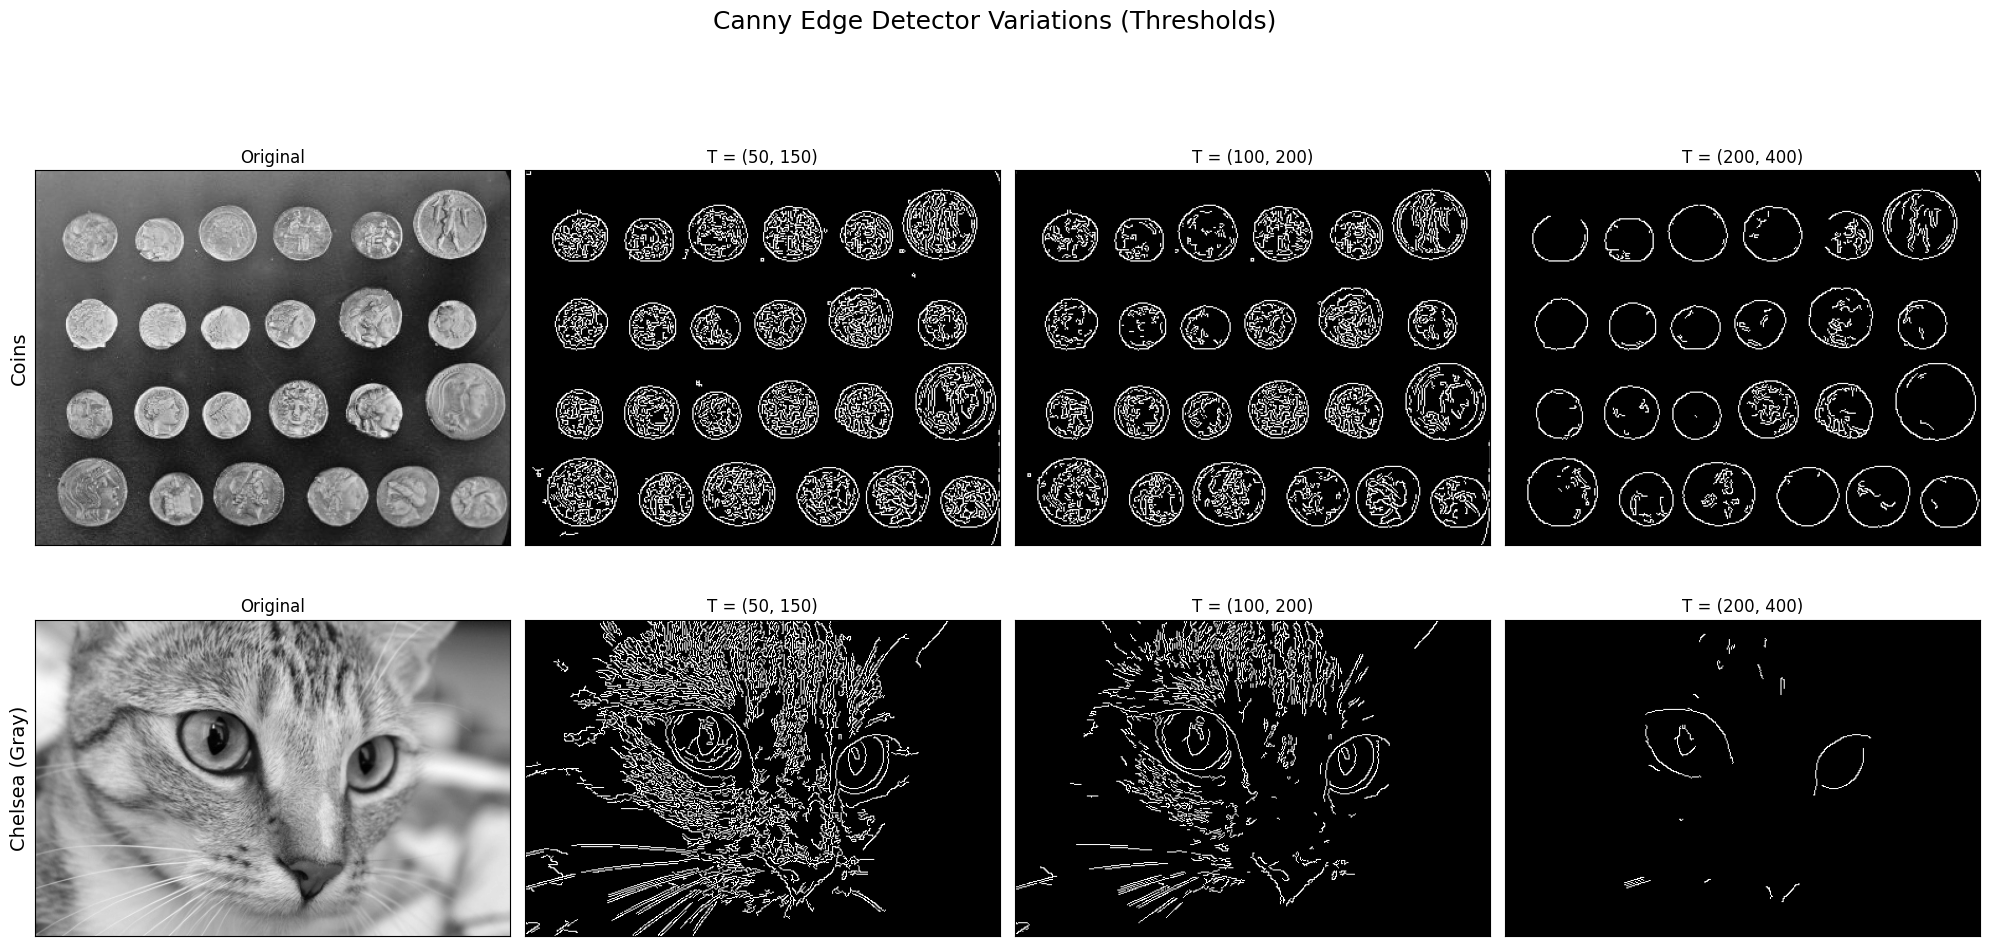

In [14]:
# Canny filter and variations
canny_params = [
    {'t_low': 50, 't_high': 150},
    {'t_low': 100, 't_high': 200},
    {'t_low': 200, 't_high': 400}
]
canny_std_results = []
canny_ext_results = []

for p in canny_params:
    t_low, t_high = p['t_low'], p['t_high']
    
    res_std = cv2.Canny(img_std_u8, t_low, t_high)
    canny_std_results.append(res_std)
    fname_std = f'output/coins_canny_{t_low}_{t_high}.png'
    cv2.imwrite(fname_std, res_std)
    results_list.append({'Image': 'coins', 'Method': 'Canny', 'Parameter': f"low={t_low}, high={t_high}", 'Output File': fname_std})
    
    res_ext = cv2.Canny(img_extra_u8, t_low, t_high)
    canny_ext_results.append(res_ext)
    fname_ext = f'output/chelsea_canny_{t_low}_{t_high}.png'
    cv2.imwrite(fname_ext, res_ext)
    results_list.append({'Image': 'chelsea', 'Method': 'Canny', 'Parameter': f"low={t_low}, high={t_high}", 'Output File': fname_ext})

print("Canny edge detection complete. 3 variations processed for 2 images.")

fig, ax = plt.subplots(2, 4, figsize=(20, 11))
fig.suptitle('Canny Edge Detector Variations (Thresholds)', fontsize=18)

ax[0, 0].imshow(img_std_u8, cmap='gray')
ax[0, 0].set_title('Original')
ax[0, 0].set_ylabel('Coins', fontsize=14)
ax[0, 1].imshow(canny_std_results[0], cmap='gray')
ax[0, 1].set_title(f"T = ({canny_params[0]['t_low']}, {canny_params[0]['t_high']})")
ax[0, 2].imshow(canny_std_results[1], cmap='gray')
ax[0, 2].set_title(f"T = ({canny_params[1]['t_low']}, {canny_params[1]['t_high']})")
ax[0, 3].imshow(canny_std_results[2], cmap='gray')
ax[0, 3].set_title(f"T = ({canny_params[2]['t_low']}, {canny_params[2]['t_high']})")

ax[1, 0].imshow(img_extra_u8, cmap='gray')
ax[1, 0].set_title('Original')
ax[1, 0].set_ylabel('Chelsea (Gray)', fontsize=14)
ax[1, 1].imshow(canny_ext_results[0], cmap='gray')
ax[1, 1].set_title(f"T = ({canny_params[0]['t_low']}, {canny_params[0]['t_high']})")
ax[1, 2].imshow(canny_ext_results[1], cmap='gray')
ax[1, 2].set_title(f"T = ({canny_params[1]['t_low']}, {canny_params[1]['t_high']})")
ax[1, 3].imshow(canny_ext_results[2], cmap='gray')
ax[1, 3].set_title(f"T = ({canny_params[2]['t_low']}, {canny_params[2]['t_high']})")

for a in ax.flat:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [15]:
# Save parameter table to .csv
df_params = pd.DataFrame(results_list)
df_params.to_csv('output/edge_parameters.csv', index=False)

print("Parameter table saved to 'output/edge_parameters.csv'")
display(df_params)

Parameter table saved to 'output/edge_parameters.csv'


,Image,Method,Parameter,Output File
0,coins,Sobel Magnitude,ksize=3,output/coins_sobel_k3.png
1,chelsea,Sobel Magnitude,ksize=3,output/chelsea_sobel_k3.png
2,coins,Sobel Magnitude,ksize=5,output/coins_sobel_k5.png
3,chelsea,Sobel Magnitude,ksize=5,output/chelsea_sobel_k5.png
4,coins,Sobel Magnitude,ksize=7,output/coins_sobel_k7.png
5,chelsea,Sobel Magnitude,ksize=7,output/chelsea_sobel_k7.png
6,coins,Canny,"low=50, high=150",output/coins_canny_50_150.png
7,chelsea,Canny,"low=50, high=150",output/chelsea_canny_50_150.png
8,coins,Canny,"low=100, high=200",output/coins_canny_100_200.png
9,chelsea,Canny,"low=100, high=200",output/chelsea_canny_100_200.png
